<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/Transfer_Learning_Images_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

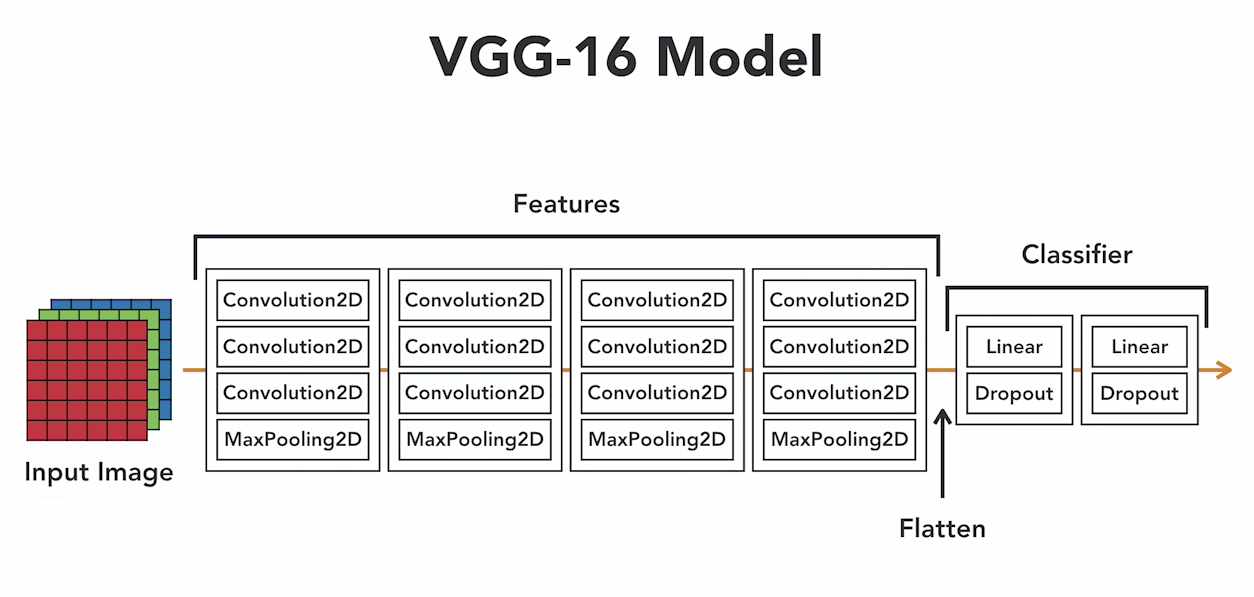

# Transfer Learning: Introduction

## VGG16

In [1]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10


In [5]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [15]:
import torchvision.models as models
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [17]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

## CIFAR-10

In [18]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [19]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [21]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# MUST RESIZE CIFAR-10 FROM 32x32 to 224x224 FOR VGG16 ARCHITECTURE
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

# Perform transformations with mean and std to match imagenets
trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified


In [22]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


# Transfer learning - Fixed Feature Extractor


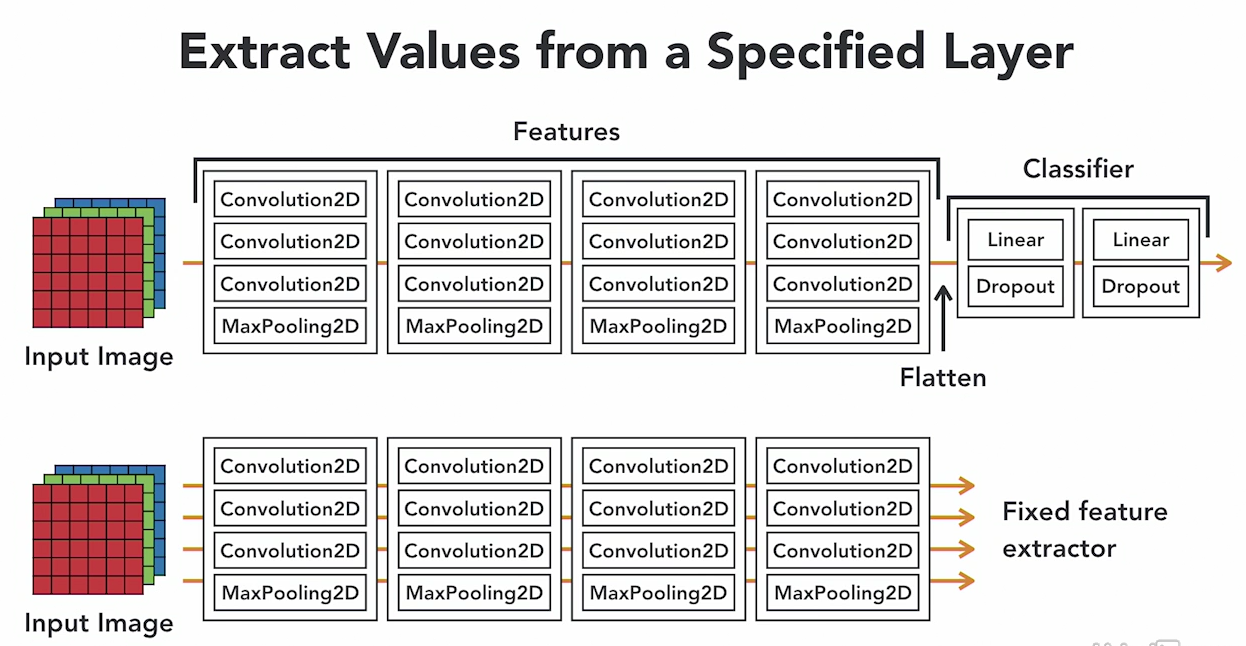

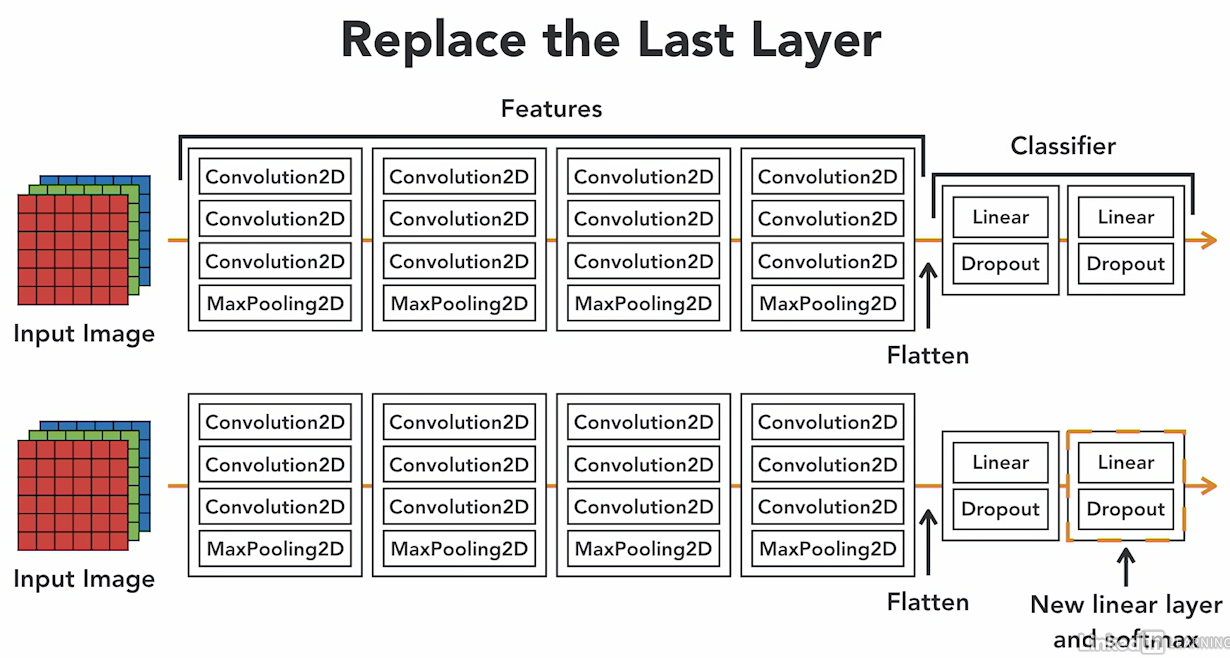

## Creating and using a Fixed Feature Extractor


In [23]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [24]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [51]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

TypeError: ignored

In [27]:
model = models.vgg16(pretrained=True)

In [28]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [29]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [30]:
## Freezed all convolutional layers
for param in model.parameters():
  param.requires_grad = False

In [31]:
## Changes the final layer
model.classifier[-1] == nn.Sequential(
    nn.Linear(in_features=4096, out_features=10),
    nn.LogSoftmax(dim=1)
)

False

In [32]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [33]:
criterion = nn.NLLLoss()

## Loss Function

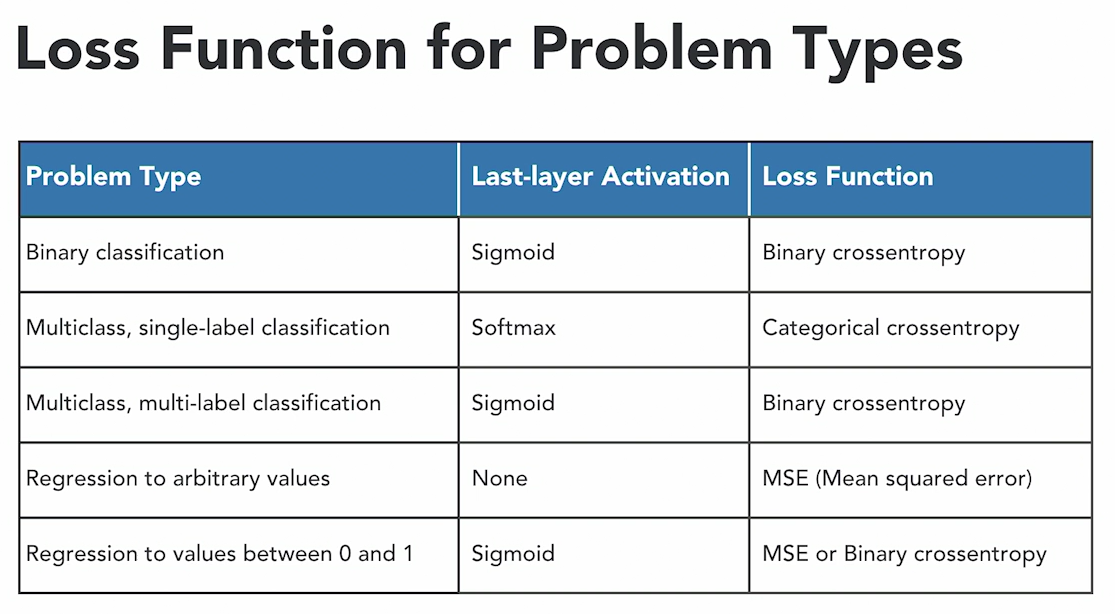

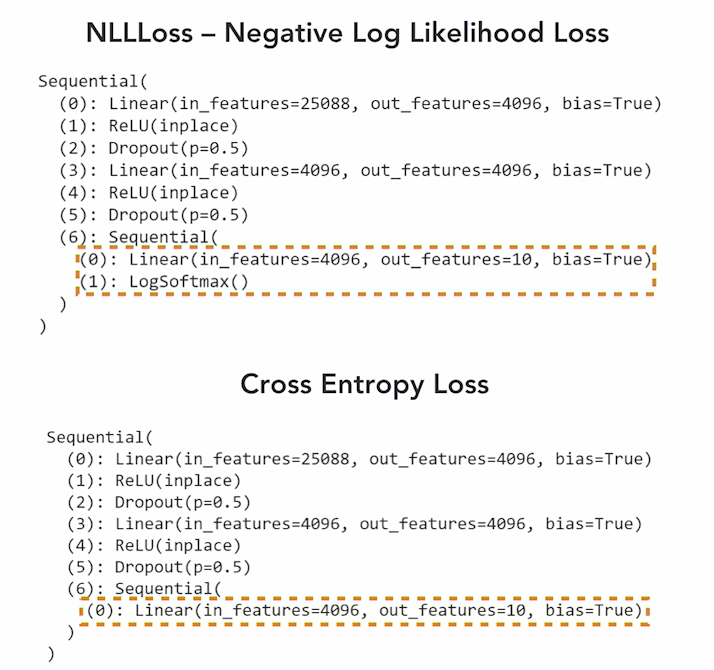

## Using Autograd with tensors

In [34]:
import torch

In [35]:
w = torch.randn(4,3,requires_grad=True)
w

tensor([[ 1.2201,  0.6659,  0.2912],
        [ 1.6909, -1.1488, -1.3980],
        [-0.4260, -0.1896, -1.3463],
        [ 1.0735, -0.0482,  1.6063]], requires_grad=True)

In [36]:
w.requires_grad_(False)

tensor([[ 1.2201,  0.6659,  0.2912],
        [ 1.6909, -1.1488, -1.3980],
        [-0.4260, -0.1896, -1.3463],
        [ 1.0735, -0.0482,  1.6063]])

In [37]:
w.requires_grad_(True)

tensor([[ 1.2201,  0.6659,  0.2912],
        [ 1.6909, -1.1488, -1.3980],
        [-0.4260, -0.1896, -1.3463],
        [ 1.0735, -0.0482,  1.6063]], requires_grad=True)

In [38]:
y = torch.exp(w)
print(y)

tensor([[3.3876, 1.9463, 1.3381],
        [5.4243, 0.3170, 0.2471],
        [0.6531, 0.8273, 0.2602],
        [2.9257, 0.9529, 4.9841]], grad_fn=<ExpBackward0>)


In [39]:
print(y.grad_fn)

In [40]:
output = y.mean()
print(output)

tensor(1.9386, grad_fn=<MeanBackward0>)


In [41]:
print(w.grad)
# Have not calculated grad yet

None


In [42]:
output.backward()
# Calculated grad through backward pass

In [43]:
print(w.grad)

tensor([[0.2823, 0.1622, 0.1115],
        [0.4520, 0.0264, 0.0206],
        [0.0544, 0.0689, 0.0217],
        [0.2438, 0.0794, 0.4153]])


In [44]:
print(output.requires_grad)

True


In [45]:
with torch.no_grad():
    output = (w+y).mean()

print(output.requires_grad)

False


## Training the Fixed Feature Extractor

1) Batch of samples plus labels
2) Forward Pass
3) Calculate Loss
4) Backward Pass
5) Update weights of the parameter

In [55]:
torch.set_grad_enabled(True)

In [102]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())

In [103]:
num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.requires_grad = True
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)})  Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')  
    

Epoch(0/1 : Batch number(1/782)  Batch loss : 1.5794872045516968
Epoch(0/1 : Batch number(2/782)  Batch loss : 1.2571756839752197
Epoch(0/1 : Batch number(3/782)  Batch loss : 1.7947064638137817
Epoch(0/1 : Batch number(4/782)  Batch loss : 2.168445587158203
Epoch(0/1 : Batch number(5/782)  Batch loss : 1.798109531402588
Epoch(0/1 : Batch number(6/782)  Batch loss : 2.015745162963867
Epoch(0/1 : Batch number(7/782)  Batch loss : 1.8475326299667358
Epoch(0/1 : Batch number(8/782)  Batch loss : 1.4926313161849976
Epoch(0/1 : Batch number(9/782)  Batch loss : 1.3457139730453491
Epoch(0/1 : Batch number(10/782)  Batch loss : 2.249575614929199
Epoch(0/1 : Batch number(11/782)  Batch loss : 1.8540349006652832
Epoch(0/1 : Batch number(12/782)  Batch loss : 1.9354759454727173
Epoch(0/1 : Batch number(13/782)  Batch loss : 1.9336856603622437
Epoch(0/1 : Batch number(14/782)  Batch loss : 2.280460834503174
Epoch(0/1 : Batch number(15/782)  Batch loss : 1.4878565073013306


KeyboardInterrupt: ignored

## Evaluating thet network and viewing images

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [105]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

count = 0
with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)
  
  output = torch.exp(logps)
  print(output)

tensor([[3.0595e+01, 1.7837e+01, 5.2570e-01,  ..., 3.4904e-01, 3.0394e+00,
         1.7598e-02],
        [1.4439e+00, 2.8409e+00, 5.8018e-02,  ..., 5.1166e-02, 5.2482e-01,
         1.0408e-01],
        [1.4318e+00, 3.9774e-01, 1.2159e-01,  ..., 3.0151e-02, 6.8295e-01,
         4.1245e-03],
        ...,
        [1.6136e+00, 1.3568e+00, 1.6520e-02,  ..., 9.9184e-02, 3.5816e+00,
         4.9937e-02],
        [1.8956e+01, 5.5480e+00, 8.5898e-02,  ..., 6.4881e+00, 8.8684e+01,
         1.3410e-02],
        [7.1859e-01, 2.0006e-01, 1.9283e-03,  ..., 4.0101e-01, 6.8481e+00,
         2.1502e-01]])


In [113]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)

  output = torch.exp(logps)

  pred = torch.max(output,1)
    
model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [134]:
test_image_id=0

# Between 0 - 63

IndexError: ignored

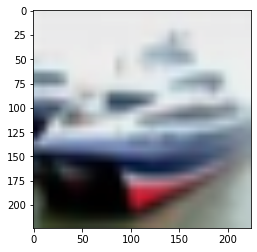

In [109]:
def denormalize(tensor):
  tensor = tensor*std+ mean
  return tensor

def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)
  
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]

show_img(images[test_image_id])
print(get_CIFAR10_class(pred[test_image_id]))

## Viewing images & normalization - Under the hood

In [114]:
pred

torch.return_types.max(
values=tensor([8.5442e+03, 8.7961e+03, 3.1709e+04, 2.8623e+03, 2.2567e+04, 1.0720e+05,
        9.9785e+04, 4.7945e+02, 3.0308e+04, 8.3402e+03, 5.6581e+03, 4.2740e+08,
        6.6506e+04, 1.6072e+05, 5.5042e+06, 6.7881e+03, 1.3467e+06, 3.1827e+05,
        3.9681e+04, 1.0415e+04, 6.1379e+02, 2.7732e+03, 2.4750e+03, 1.7376e+05,
        3.2806e+05, 1.7541e+03, 6.5751e+02, 8.4201e+02, 4.4426e+05, 4.8999e+03,
        2.2026e+03, 6.4678e+04, 7.3531e+02, 6.2806e+03, 1.0741e+06, 1.1530e+04,
        9.3365e+05, 8.1773e+05, 1.2018e+04, 1.6942e+06, 1.4550e+04, 3.1113e+03,
        9.8561e+04, 1.6102e+03, 5.5424e+03, 2.1161e+06, 9.0568e+04, 3.8804e+05,
        9.0811e+05, 8.5088e+04, 2.8239e+05, 3.3417e+04, 4.7051e+04, 5.9362e+03,
        6.5865e+04, 4.6542e+06, 1.3106e+04, 7.6699e+02, 1.1940e+03, 4.7562e+02,
        4.0378e+06, 6.1466e+03, 3.0344e+03, 1.6927e+05]),
indices=tensor([103, 473, 408, 419, 364, 274, 817, 906, 335, 482, 812, 675, 152, 375,
        675, 392, 156, 67

In [115]:
images.size()

torch.Size([64, 3, 224, 224])

In [119]:
images[0].size()

torch.Size([3, 224, 224])

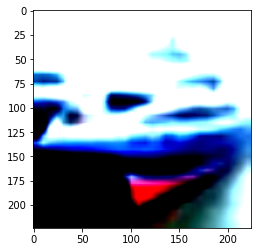

In [122]:
plt.imshow(np.transpose(images[test_image_id], (1,2,0)))

In [128]:
def denomralize(tensor):
  tensor = tensor*std+mean
  return tensor

In [129]:
def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img, 0, 1)
  plt.imshow(img)

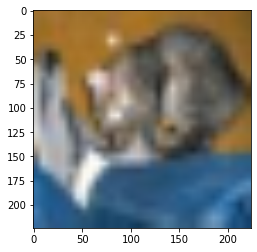

In [135]:
show_img(images[test_image_id])

In [138]:
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]


In [ ]:
get_CIFAR10_class(pred[test_image_id])

## Accuracy of the model

In [141]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[3.0595e+01, 1.7837e+01, 5.2570e-01,  ..., 3.4904e-01, 3.0394e+00,
         1.7598e-02],
        [1.4439e+00, 2.8409e+00, 5.8018e-02,  ..., 5.1166e-02, 5.2482e-01,
         1.0408e-01],
        [1.4318e+00, 3.9774e-01, 1.2159e-01,  ..., 3.0151e-02, 6.8295e-01,
         4.1245e-03],
        ...,
        [1.6136e+00, 1.3568e+00, 1.6520e-02,  ..., 9.9184e-02, 3.5816e+00,
         4.9937e-02],
        [1.8956e+01, 5.5480e+00, 8.5898e-02,  ..., 6.4881e+00, 8.8684e+01,
         1.3410e-02],
        [7.1859e-01, 2.0006e-01, 1.9283e-03,  ..., 4.0101e-01, 6.8481e+00,
         2.1502e-01]])


In [ ]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0

    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)

        pred = torch.argmax(output, 1)
        total += labels.size(0)        

        cnt+=1
        
        if cnt > 0:
          break

In [144]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0


    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

Batch (1/157)
Batch (2/157)
Batch (3/157)
Batch (4/157)
Batch (5/157)
Accuracy of the model on 320 test images: 0.0% 


# Transfer learning - Fine-tuning



## Fine Tuning

In [145]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [146]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [147]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [148]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified


In [149]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [150]:
model = models.vgg16(pretrained=True)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [151]:
for param in model.parameters():
  param.requires_grad = False

In [152]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [153]:
for i in range(0,7):
  model.classifier[i].requires_grad = True

In [154]:
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096,512),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(512,10),
                      nn.LogSoftmax(dim=1)
                      )


In [155]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
    (4): LogSoftmax(dim=1)
  )
)

In [156]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [157]:
criterion = nn.NLLLoss()

In [158]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())


## Training from the Fully Connected Network onwards

### Re-training the model

In [159]:
model = model.to(device)
optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)}) : Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')  
    

Epoch(0/1 : Batch number(1/782) : Batch loss : 2.3620846271514893
Epoch(0/1 : Batch number(2/782) : Batch loss : 2.138949155807495
Epoch(0/1 : Batch number(3/782) : Batch loss : 2.0060431957244873
Epoch(0/1 : Batch number(4/782) : Batch loss : 1.6810859441757202
Epoch(0/1 : Batch number(5/782) : Batch loss : 1.5945069789886475
Epoch(0/1 : Batch number(6/782) : Batch loss : 1.389344334602356
Epoch(0/1 : Batch number(7/782) : Batch loss : 1.2469229698181152
Epoch(0/1 : Batch number(8/782) : Batch loss : 1.207769513130188
Epoch(0/1 : Batch number(9/782) : Batch loss : 1.0705914497375488
Epoch(0/1 : Batch number(10/782) : Batch loss : 1.3266781568527222
Epoch(0/1 : Batch number(11/782) : Batch loss : 1.0323082208633423
Epoch(0/1 : Batch number(12/782) : Batch loss : 1.1073355674743652
Epoch(0/1 : Batch number(13/782) : Batch loss : 0.9151110649108887
Epoch(0/1 : Batch number(14/782) : Batch loss : 1.0256448984146118
Epoch(0/1 : Batch number(15/782) : Batch loss : 1.0783369541168213
Epoch(0

### The accuracy of the model

In [ ]:
model.to('cpu')

model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

Batch (1/157)


# Transfer learning - Learning Rate


## Fine Tuning

In [ ]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

In [ ]:
model = models.vgg16(pretrained=True)
model.classifier

In [ ]:
for param in model.parameters():
  param.requires_grad = False

In [ ]:
for i in range(0,7):
  model.classifier[i].requires_grad = True

In [ ]:
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096,512),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(512,10),
                      nn.LogSoftmax(dim=1)
                      )


In [ ]:
model

In [ ]:
criterion = nn.NLLLoss()

In [ ]:
from torch.optim import Adam

model = model.to(device)



## Training from the Fully Connected Network onwards

### Re-training the model

In [ ]:
from torch.optim import Adam

lr = 3e-4
optimizer = Adam([
    { 'params': model.classifier[0].parameters(), 'lr': lr},
    { 'params': model.classifier[3].parameters(), 'lr': lr},
    { 'params': model.classifier[6].parameters(), 'lr': lr}
    ], lr=lr)

In [ ]:
model = model.to(device)
#optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)}) : Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')  
    

### The accuracy of the model

In [ ]:
model.to('cpu')

model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

## Un-freezing & training on the LAST CNN block onwards

### Re-training the model

In [ ]:
for i in range(24,31):
  model.features[i].requires_grad = True


In [ ]:
from torch.optim import Adam

lr = 3e-4
optimizer = Adam([
    { 'params': model.features[24].parameters(), 'lr': lr},
    { 'params': model.features[26].parameters(), 'lr': lr},
    { 'params': model.features[28].parameters(), 'lr': lr},
    { 'params': model.classifier[0].parameters(), 'lr': lr},
    { 'params': model.classifier[3].parameters(), 'lr': lr},
    { 'params': model.classifier[6].parameters(), 'lr': lr}
    ], lr=lr)

In [ ]:
model = model.to(device)
#optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 3
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)}) : Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')  
    

### The accuracy of the model

In [ ]:
model.to('cpu')

model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

## Un-freezing & training on the LAST TWO CNN block onwards

### Re-training the model

In [ ]:
for i in range(17,24):
  model.features[i].requires_grad = True

In [ ]:
from torch.optim import Adam

lr = 3e-4
optimizer = Adam([
    { 'params': model.features[17].parameters(), 'lr': lr},
    { 'params': model.features[19].parameters(), 'lr': lr},
    { 'params': model.features[21].parameters(), 'lr': lr},
    { 'params': model.features[24].parameters(), 'lr': lr},
    { 'params': model.features[26].parameters(), 'lr': lr},
    { 'params': model.features[28].parameters(), 'lr': lr},
    { 'params': model.classifier[0].parameters(), 'lr': lr},
    { 'params': model.classifier[3].parameters(), 'lr': lr},
    { 'params': model.classifier[6].parameters(), 'lr': lr}
    ], lr=lr)

In [ ]:
model = model.to(device)
#optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)}) : Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')  
    

### The accuracy of the model

In [ ]:
model.to('cpu')

model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')